**Working Version, see later section for tests**

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def value(x_true, y_true, x_sensor, y_sensor):
    return 1 / (0.1 + (x_true - x_sensor)**2 + (y_true - y_sensor)**2)

# Read observed values from file
with open("EarthquakeExerciseData.txt") as f:
    lines = f.readlines()
v_observed = [float(line.strip()) for line in lines]

num_explosions = 2

# Define the coordinate system:
S = 2000  # number of points on the spiral
theta = 55 * 2 * np.pi * np.arange(S) / S
r = np.arange(S) / S
x = r * np.cos(theta)
y = r * np.sin(theta)

# Define the locations of the detection stations on the surface
N = len(v_observed)  # number of stations (will be overwritten by file length)
theta_sensor = 2 * np.pi * np.arange(N) / N
x_sensor = np.cos(theta_sensor)
y_sensor = np.sin(theta_sensor)

# Calculate the explosion values for the sensors
v = np.zeros((S, N))
for sensor in range(N):
    for s in range(S):
        v[s, sensor] = value(x[s], y[s], x_sensor[sensor], y_sensor[sensor])

# Perform inference p(location|observed sensor values) given these sensor values
max_prob = 0
logp1 = np.zeros(S)
logp2 = np.zeros(S)
for s in range(S):
    loc_prob = 0
    for s2 in range(S):
        #if s == s2:
        #    continue
        combined = 0
        for sensor in range(N):
            calc1 = value(x[s], y[s], x_sensor[sensor], y_sensor[sensor])
            calc2 = value(x[s2], y[s2], x_sensor[sensor], y_sensor[sensor])
            combined += -0.5 * (v_observed[sensor] - (calc1+calc2))**2
        combined = np.exp(combined)
        if combined > loc_prob:
            loc_prob = combined
            logp1[s] = loc_prob
            logp2[s2] = loc_prob
        if combined > max_prob:
            max_prob = combined
            max_idx = (s, s2)



(0.2743433190292394, 0.4322958978570361)
-0.0
(-0.842216165553134, 0.18825761732523844)
2.6222664796810748e-05


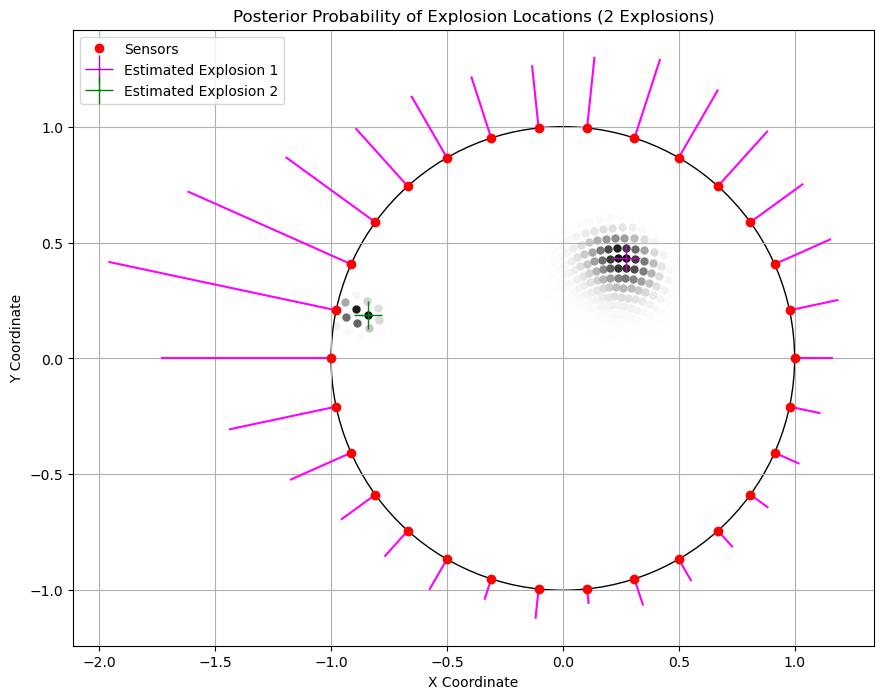

In [47]:
logp = logp1 + logp2

p = logp - np.max(logp)  # do exponentiation (and avoid over/underflow)
p /= np.sum(p)  # normalize
maxp = np.max(p)

print((x[max_idx[0]], y[max_idx[0]]))
print(p[max_idx[0]])
print((x[max_idx[1]], y[max_idx[1]]))
print(p[max_idx[1]])

fig = plt.figure(figsize=(11,8))
ax = fig.subplots()

# Plot sensor locations
for s in range(S):
    ax.plot(x[s], y[s], ".", color=(((p[s] / maxp))) * np.ones(3), markersize=10, zorder=0)

# Draw circle formed by sensors
sensors_circle = plt.Circle((0,0),1, fill=False)
ax.add_artist(sensors_circle)

for sensor in range(N):
# Normalize the line length to the observed data
    line_length = v_observed[sensor] / np.max(v_observed)
    ax.plot([x_sensor[sensor], x_sensor[sensor] * (1 + line_length)],
            [y_sensor[sensor], y_sensor[sensor] * (1 + line_length)],
            color='magenta')

ax.plot(x_sensor, y_sensor, "ro", label="Sensors")
ax.plot(x[max_idx[0]], y[max_idx[0]], "m+", markersize=20, label="Estimated Explosion 1")
ax.plot(x[max_idx[1]], y[max_idx[1]], "g+", markersize=20, label="Estimated Explosion 2")
ax.legend()
ax.set_title('Posterior Probability of Explosion Locations (2 Explosions)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_aspect(1)
ax.grid()
plt.show()

In [65]:
print((x[max_idx[0]], y[max_idx[0]]))
print(p[max_idx[0]])
print((x[max_idx[1]], y[max_idx[1]]))
print(p[max_idx[1]])

print(max_idx)
print(max(logp2))
print(np.exp(logp[1726]))
print(p[1024])
print(p[1726])

(0.2743433190292394, 0.4322958978570361)
-0.0
(-0.842216165553134, 0.18825761732523844)
2.6222664796810748e-05
(1024, 1726)
0.02898653918981152
1.642177504825416
-0.0
2.6222664796810748e-05


**Tests below**

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def value(x_true, y_true, x_sensor, y_sensor):
    return 1 / (0.1 + (x_true - x_sensor)**2 + (y_true - y_sensor)**2)

# Read observed values from file
with open("EarthquakeExerciseData.txt") as f:
    lines = f.readlines()
v_observed = [float(line.strip()) for line in lines]

num_explosions = 2

# Define the coordinate system:
S = 500  # number of points on the spiral
theta = 55 * 2 * np.pi * np.arange(S) / S
r = np.arange(S) / S
x = r * np.cos(theta)
y = r * np.sin(theta)

# Define the locations of the detection stations on the surface
N = len(v_observed)  # number of stations (will be overwritten by file length)
theta_sensor = 2 * np.pi * np.arange(N) / N
x_sensor = np.cos(theta_sensor)
y_sensor = np.sin(theta_sensor)

# Calculate the explosion values for the sensors
v = np.zeros((S, N))
for sensor in range(N):
    for s in range(S):
        v[s, sensor] = value(x[s], y[s], x_sensor[sensor], y_sensor[sensor])

# Perform inference p(location|observed sensor values) given these sensor values
max_prob = 0
logps = np.zeros((S, S))
logp1 = np.zeros(S)
logp10 = np.zeros(S)
logp2 = np.zeros(S)
for s in range(S):
    loc_prob = 0
    for s2 in range(S):
        #if s == s2:
        #    continue
        combined = 0
        for sensor in range(N):
            calc1 = value(x[s], y[s], x_sensor[sensor], y_sensor[sensor])
            calc2 = value(x[s2], y[s2], x_sensor[sensor], y_sensor[sensor])
            combined += -0.5 * (v_observed[sensor] - (calc1+calc2))**2
        combined_exp = np.exp(combined)
        logps[s, s2] = combined
        if combined_exp > loc_prob:
            loc_prob = combined_exp
            logp1[s] = loc_prob
            logp2[s2] = loc_prob
        if combined_exp > max_prob:
            max_prob = combined_exp
            max_idx = (s, s2)



In [42]:
logsum1 = np.sum(logps, axis=0)
logsum2 = np.sum(logps, axis=1)
logsum = logsum1 + logsum2

(0.2743433190292394, 0.4322958978570361)
0.002693400064431565
(-0.9371020371951733, 0.17876177411475905)
0.002686573369580629


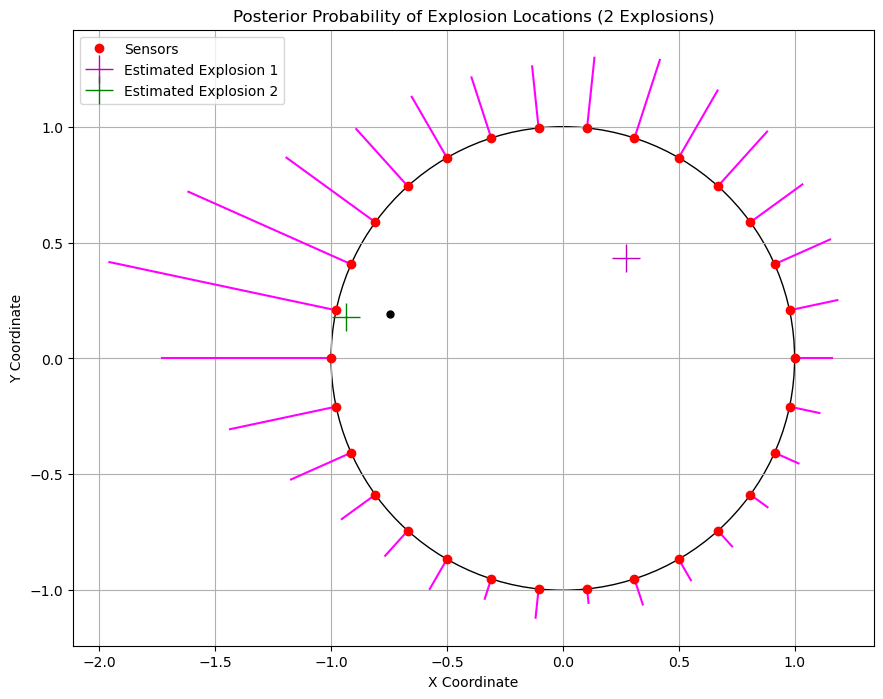

In [44]:
logp = logp1 + logp2

p = np.exp(logp - np.max(logp))  # do exponentiation (and avoid over/underflow)
p /= np.sum(p)  # normalize

maxp = np.max(p)

p1 = np.exp(logp1 - np.max(logp1))  # do exponentiation (and avoid over/underflow)
p1 /= np.sum(p1)  # normalize

p2 = np.exp(logp2 - np.max(logp2))  # do exponentiation (and avoid over/underflow)
p2 /= np.sum(p2)  # normalize

px = p1+p2
maxpx = np.max(px)

ps = np.exp(logsum - np.max(logsum))
maxps = np.max(ps)

# Plot the posterior and most likely location of the explosion:
print((x[max_idx[0]], y[max_idx[0]]))
print(p[max_idx[0]])
print((x[max_idx[1]], y[max_idx[1]]))
print(p[max_idx[1]])


fig = plt.figure(figsize=(11,8))
ax = fig.subplots()

# Plot sensor locations
for s in range(S):
    ax.plot(x[s], y[s], ".", color=((1-(ps[s] / maxps))) * np.ones(3), markersize=10, zorder=0)

# Draw circle formed by sensors
sensors_circle = plt.Circle((0,0),1, fill=False)
ax.add_artist(sensors_circle)

for sensor in range(N):
# Normalize the line length to the observed data
    line_length = v_observed[sensor] / np.max(v_observed)
    ax.plot([x_sensor[sensor], x_sensor[sensor] * (1 + line_length)],
            [y_sensor[sensor], y_sensor[sensor] * (1 + line_length)],
            color='magenta')

ax.plot(x_sensor, y_sensor, "ro", label="Sensors")
ax.plot(x[max_idx[0]], y[max_idx[0]], "m+", markersize=20, label="Estimated Explosion 1")
ax.plot(x[max_idx[1]], y[max_idx[1]], "g+", markersize=20, label="Estimated Explosion 2")
ax.legend()
ax.set_title('Posterior Probability of Explosion Locations (2 Explosions)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_aspect(1)
ax.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def value(x_true, y_true, x_sensor, y_sensor):
    return 1 / (0.1 + (x_true - x_sensor)**2 + (y_true - y_sensor)**2)

def load_sensor_data(file_path):
    # Assuming text file with 1D sensor data for each of the 30 sensors
    return np.loadtxt(file_path)

def earthquake(sensor_data_file):
    # Number of points on the spiral
    S = 5000
    theta = 45 * 2 * np.pi * np.arange(S) / S
    r = np.arange(S) / S
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    sensor_data = load_sensor_data(sensor_data_file)

    # Define the locations of the detection stations on the surface
    N = len(sensor_data)  # number of stations (will be overwritten by file length)
    theta_sensor = 2 * np.pi * np.arange(N) / N
    x_sensor = np.cos(theta_sensor)
    y_sensor = np.sin(theta_sensor)

    # Calculate the explosion values for the sensors
    v = np.zeros((S, N))
    for sensor in range(N):
        for s in range(S):
            v[s, sensor] = value(x[s], y[s], x_sensor[sensor], y_sensor[sensor])

    sd = 1  # Standard deviation of the Gaussian noise

    # Perform inference p(location|observed sensor values) given these sensor values
    logp = np.zeros(S)

    for s in range(S):
        for sensor in range(N):
            logp[s] += -0.5 * (sensor_data[sensor] - v[s, sensor]) ** 2 / (sd ** 2)

    p = np.exp(logp - np.max(logp))
    p = p / np.sum(p)

    # Plot the posterior and most likely location of the explosion
    maxp, maxind = np.max(p), np.argmax(p)

    plt.figure()
    for s in range(S):
        plt.plot(x[s], y[s], ".", color=(1 - (p[s] / maxp)) * np.array([1, 1, 1]))

    theta_values = np.arange(0, 2 * np.pi, 0.01)
    for theta in theta_values:
        plt.plot(np.cos(theta), np.sin(theta), ".", color=np.array([0, 0, 0]))

    plt.plot(x[maxind], y[maxind], "m+", markersize=20, label="Estimated (most likely)")
    #plt.plot(np.sum(p * x), np.sum(p * y), "go", markersize=10, label="Estimated (average)")
    plt.legend()
    plt.show()

# Provide the correct file path to your sensor data file
sensor_data_file_path = 'EarthquakeExerciseData.txt'

# Call the earthquake function with the sensor data file
earthquake(sensor_data_file_path)


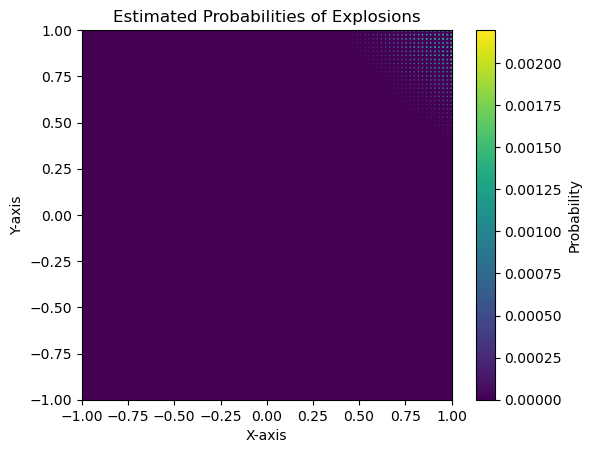

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def value(x_true1, y_true1, x_true2, y_true2, x_sensor, y_sensor):
    return 1 / (0.1 + (x_true1 - x_sensor)**2 + (y_true1 - y_sensor)**2) + 1 / (0.1 + (x_true2 - x_sensor)**2 + (y_true2 - y_sensor)**2)

def load_sensor_data(file_path):
    # Assuming text file with 1D sensor data for each of the 30 sensors
    return np.loadtxt(file_path)

def earthquake(sensor_data_file):
    # Number of points on the spiral
    S = 500
    theta = 45 * 2 * np.pi * np.arange(S) / S
    r = np.arange(S) / S
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    sensor_data = load_sensor_data(sensor_data_file)

    # Define the locations of the detection stations on the surface
    N = len(sensor_data)  # number of stations (will be overwritten by file length)
    theta_sensor = 2 * np.pi * np.arange(N) / N
    x_sensor = np.cos(theta_sensor)
    y_sensor = np.sin(theta_sensor)

    # Calculate the explosion values for the sensors
    v = np.zeros((S, N))
    for sensor in range(N):
        for s in range(S):
            # Assume two explosion locations (adjust as needed)
            v[s, sensor] = value(0.5, 0.5, -0.5, -0.5, x[s], y[s])

    sd = 1  # Standard deviation of the Gaussian noise

    # Perform inference p(location|observed sensor values) given these sensor values
    logp = np.zeros((S, S))

    for s1 in range(S):
        for s2 in range(S):
            for sensor in range(N):
                logp[s1, s2] += -0.5 * (sensor_data[sensor] - v[s1, sensor] - v[s2, sensor]) ** 2 / (sd ** 2)

    # Normalize probabilities
    p = np.exp(logp - np.max(logp))
    p = p / np.sum(p)

    # Plot the probabilities
    plt.imshow(p, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
    plt.colorbar(label='Probability')
    plt.title('Estimated Probabilities of Explosions')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

# Provide the correct file path to your sensor data file
sensor_data_file_path = 'EarthquakeExerciseData.txt'

# Call the earthquake function with the sensor data file
earthquake(sensor_data_file_path)
